# KNN 다중 분류 - IRIS 데이터셋 / Wine 데이터 셋

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

## #02. IRIS 데이터 셋

### [1] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/iris.xlsx", categories=['Species'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Sepal.Length  150 non-null    float64 
 1   Sepal.Width   150 non-null    float64 
 2   Petal.Length  150 non-null    float64 
 3   Petal.Width   150 non-null    float64 
 4   Species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

데이터프레임 상위 5개 행
+----+----------------+---------------+----------------+---------------+-----------+
|    |   Sepal.Length |   Sepal.Width |   Petal.Length |   Petal.Width | Species   |
|----+----------------+---------------+----------------+---------------+-----------|
|  0 |            5.1 |           3.5 |            1.4 |           0.2 | setosa    |
|  1 |            4.9 |             3 |            1.4 |           0.2 | setosa    |
|  2 |            4.7 |           3.2 |            1.3 |           0.2 | setosa    |
|  3

### [2] 데이터 전처리

1. 종속변수 라벨링
3. 훈련/검증 데이터 분리 + 데이터 스케일링

In [3]:
df = my_labelling(origin, 'Species')

x_train, x_test, y_train, y_test = my_train_test_split(df, yname='Species', test_size=0.2, scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### [3] KNN 분류 구현

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
|  8 | manhattan |             5 | uniform   |          0.983333 |
| 10 | manhattan |             7 | uniform   |             0.975 |
|  9 | manhattan |             5 | distance  |          0.966667 |
| 11 | manhattan |             7 | distance  |          0.958333 |
|  2 | euclidean |             5 | uniform   |          0.958333 |
|  0 | euclidean |             3 | uniform   |              0.95 |
|  3 | euclidean |             5 | distance  |              0.95 |
|  4 | euclidean |             7 | uniform   |              0.95 |
|  6 | manhattan |             3 | uniform   |              0.95 |
|  7 | manhattan |             3 | distance  |              0.95 |
|  1 | euclidean |             3 | distance  |          0.941667 |
|  5 | euclidean |             7 | distance  |         

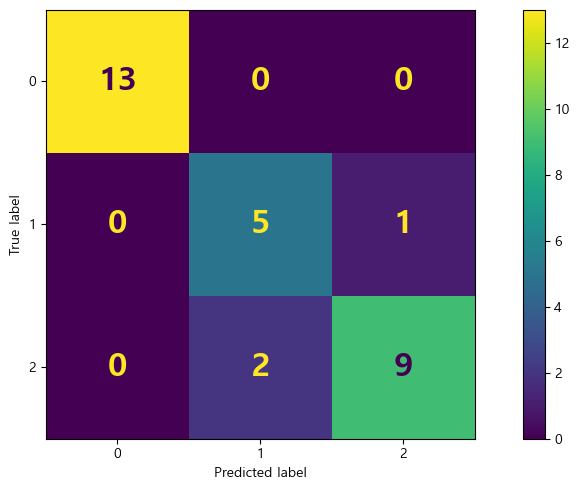


[Roc Curve]


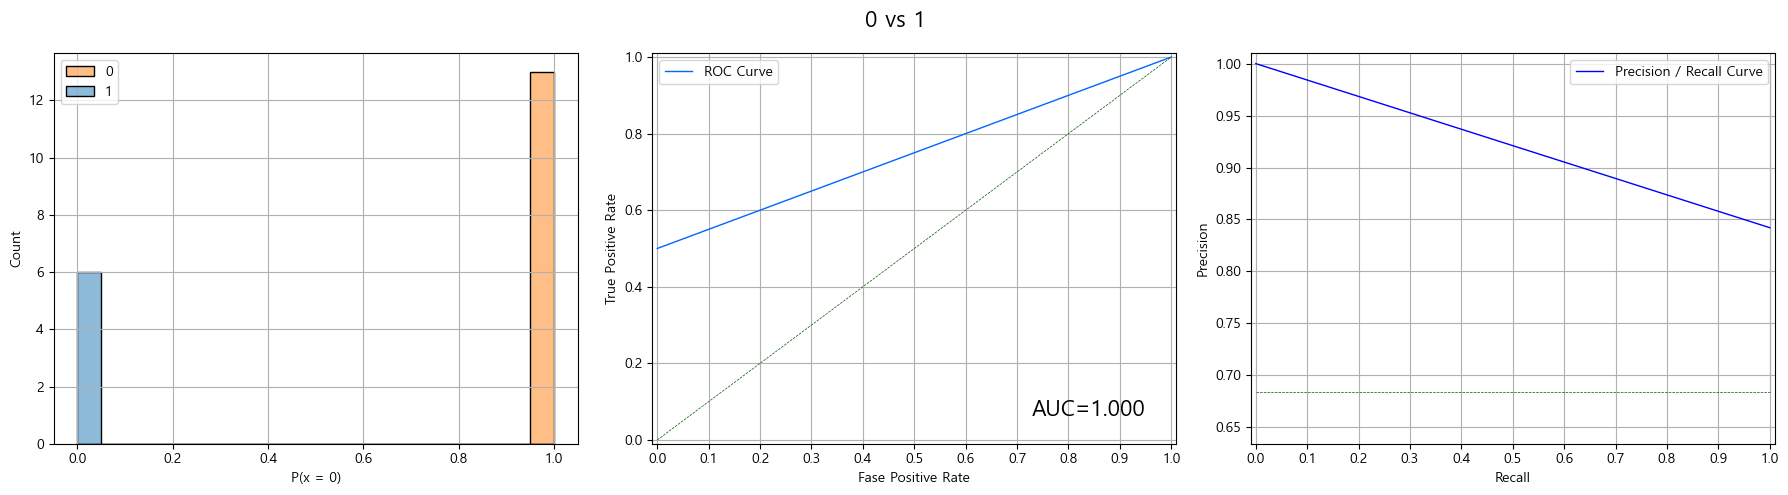

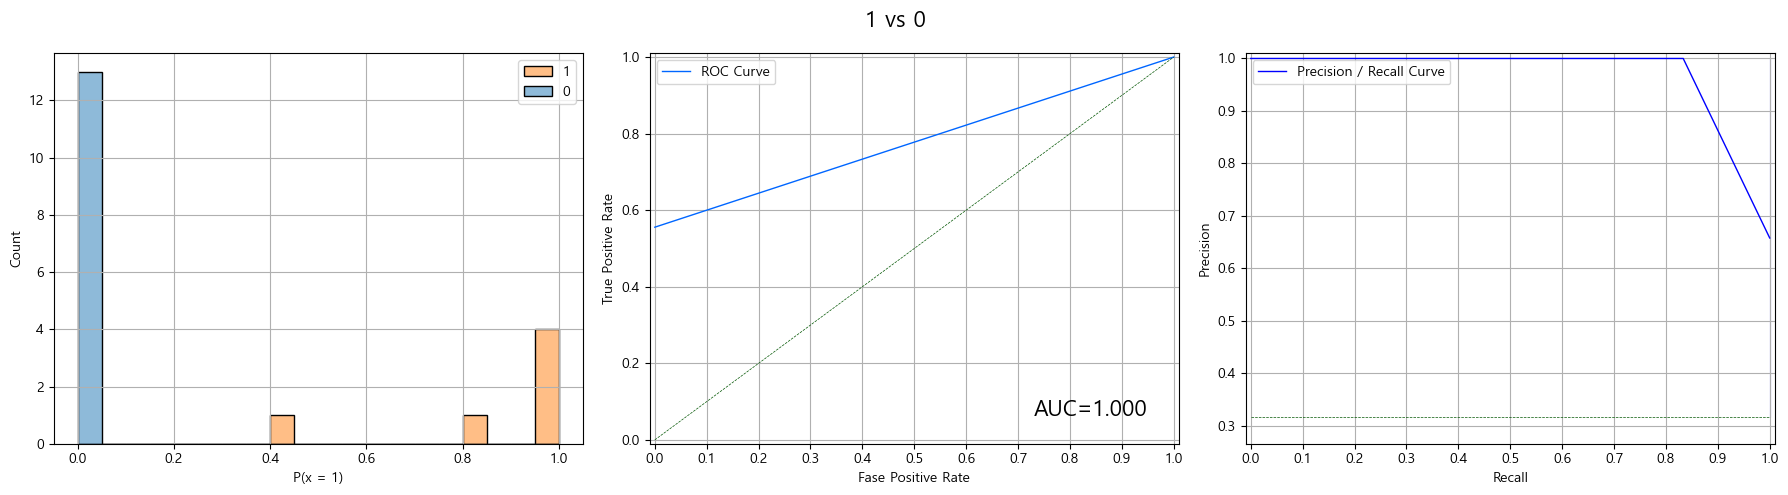

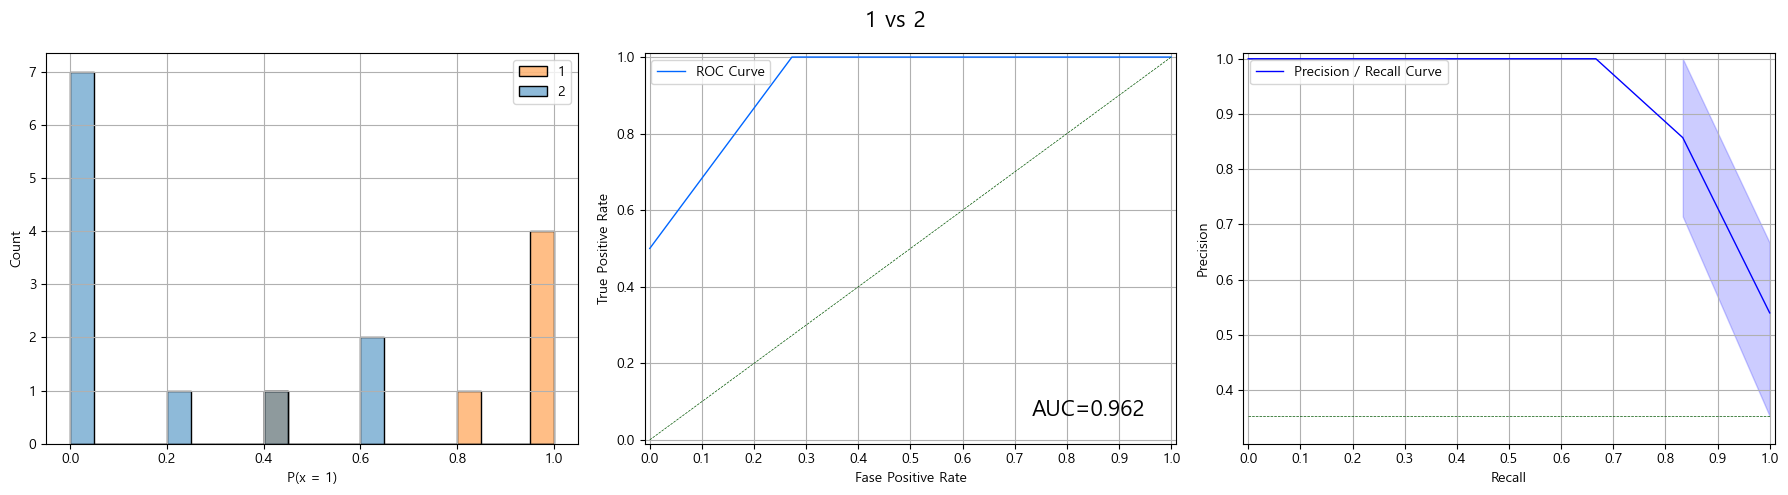

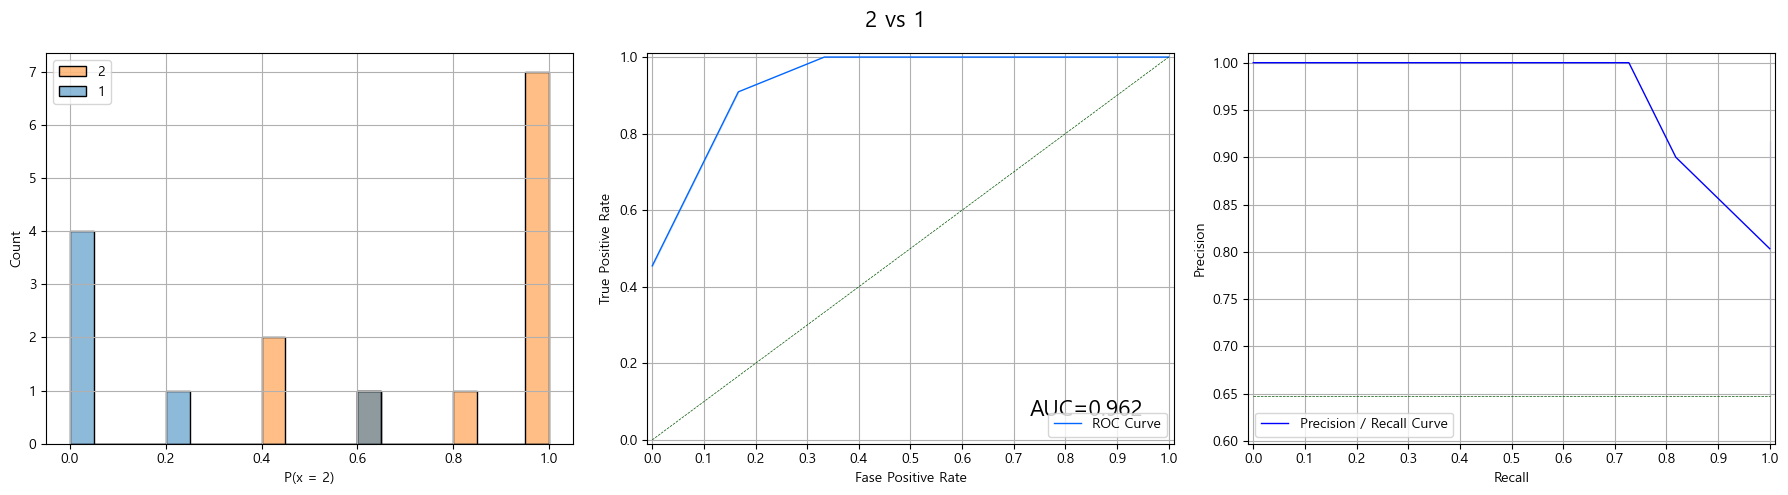

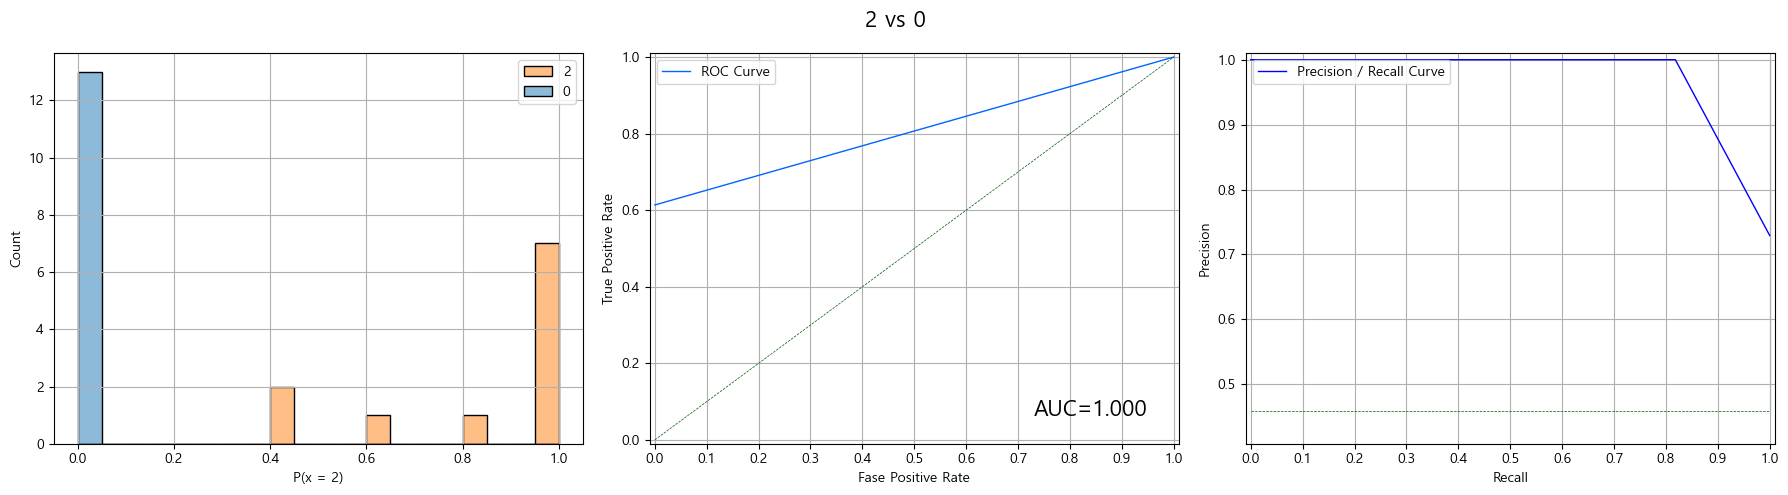

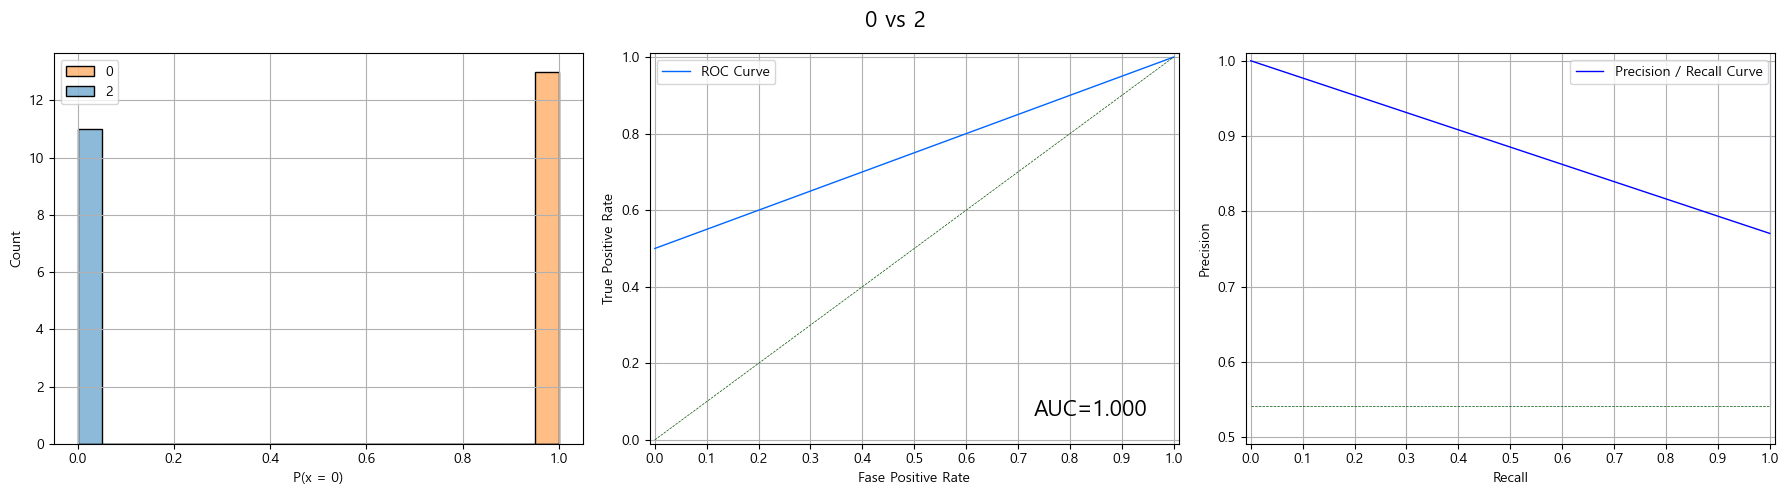

mean roc auc ovo: 0.9874


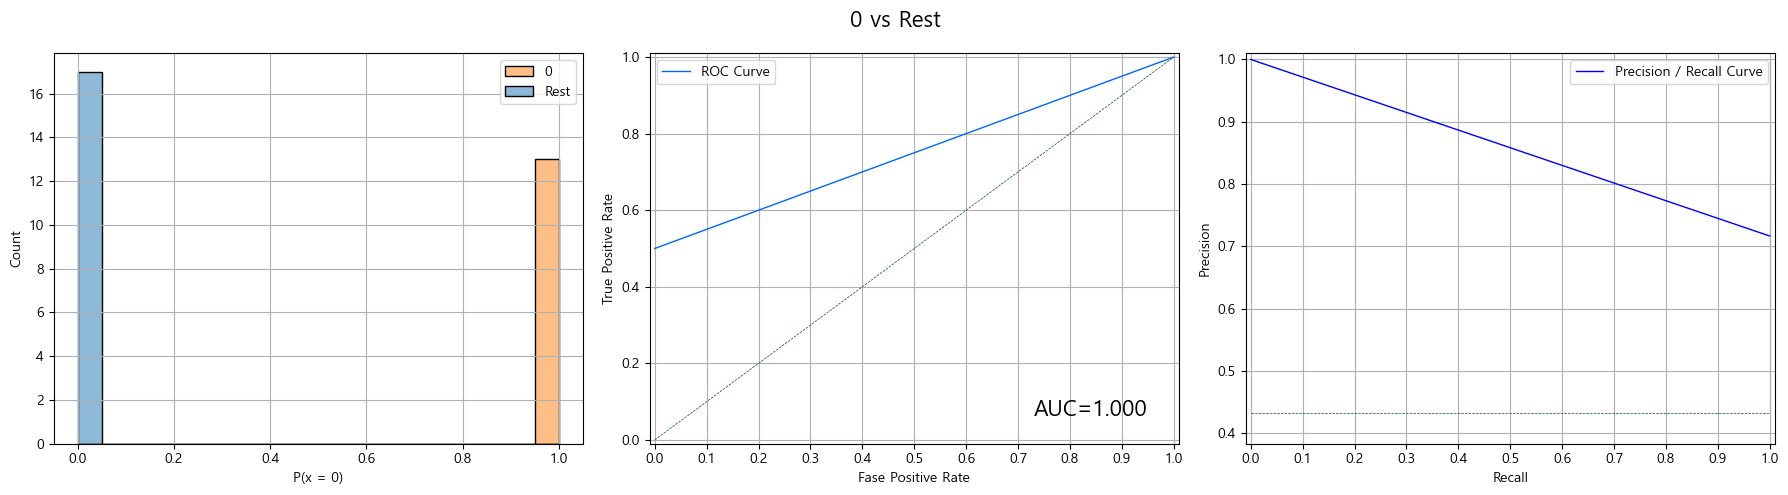

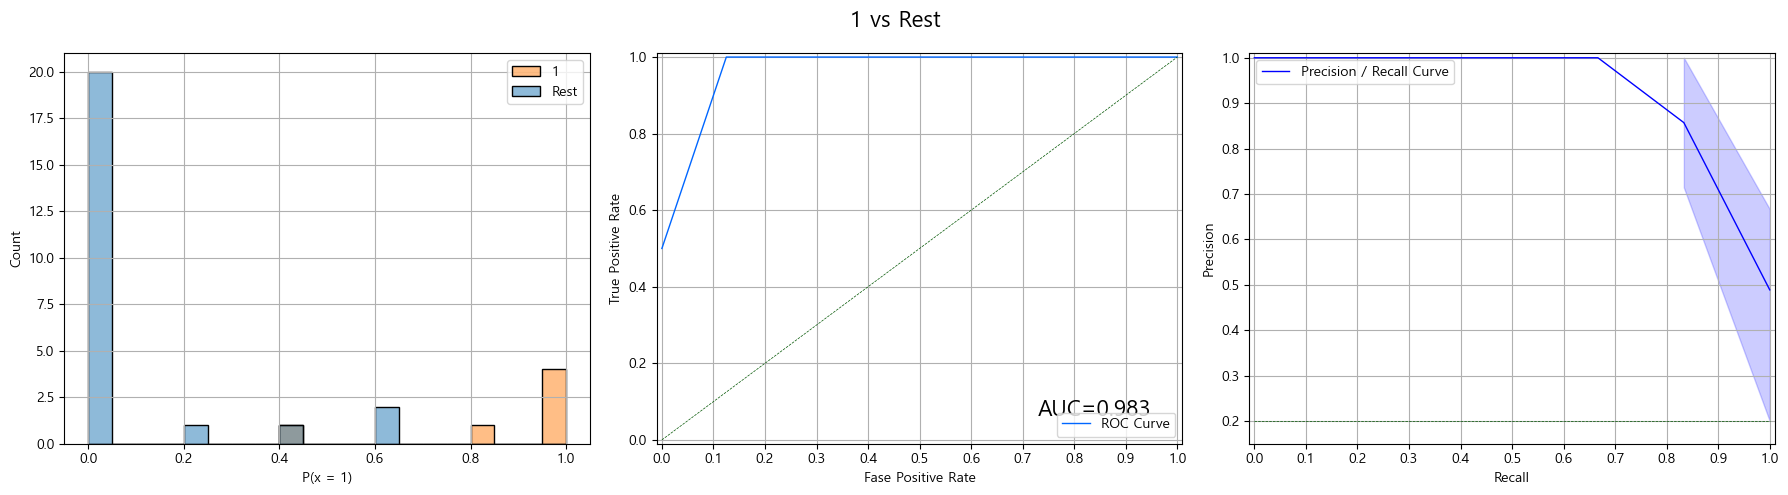

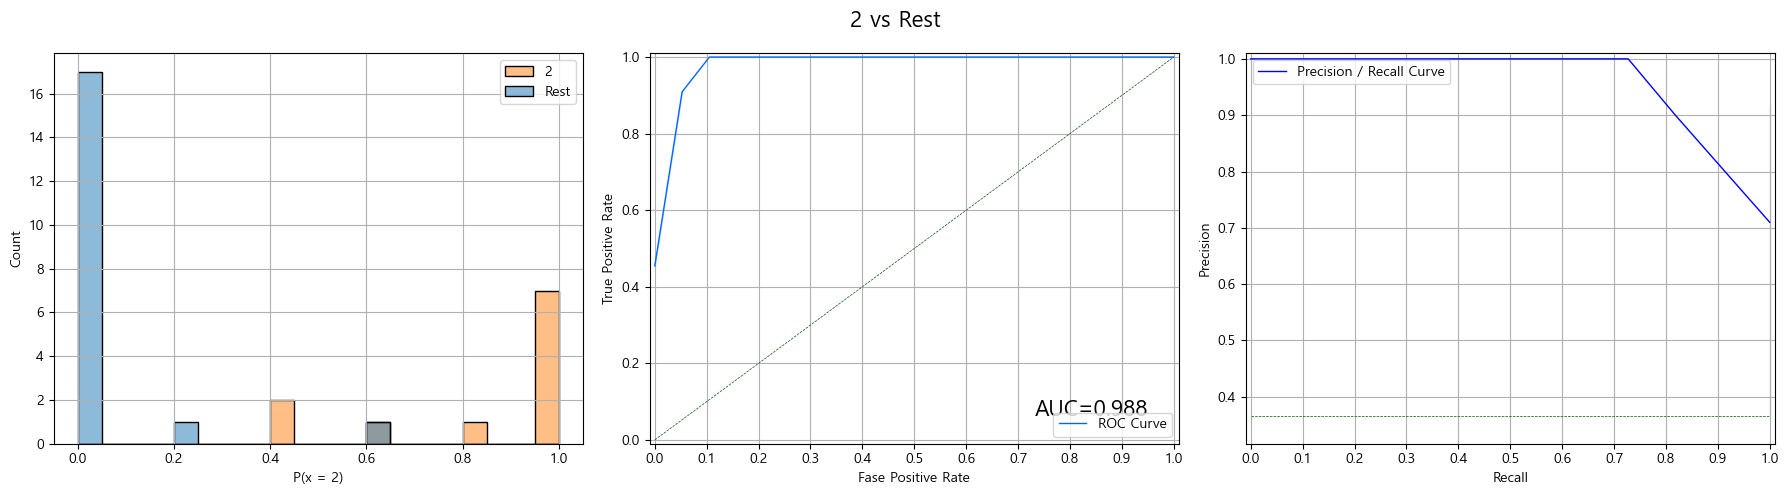

mean roc auc ovo: 0.9902

[학습곡선]


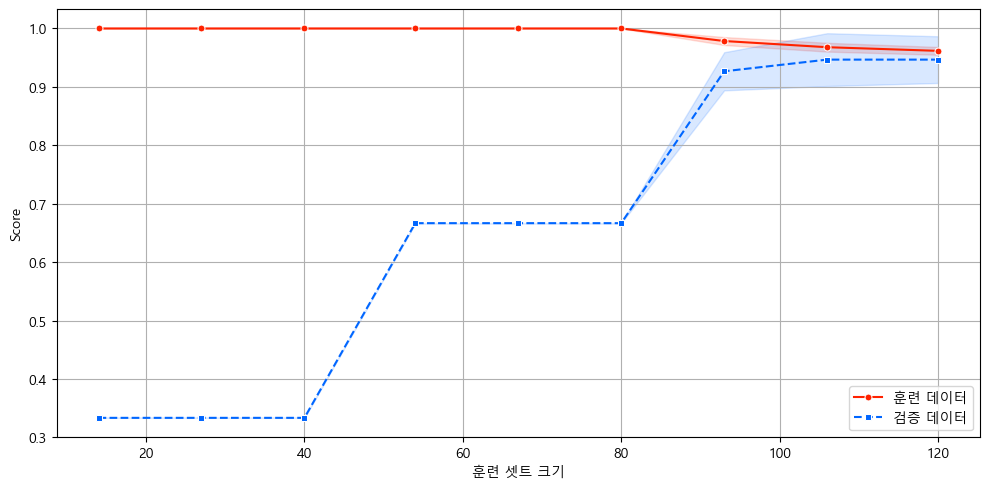

KNeighborsClassifier(metric='manhattan', n_jobs=-1)

In [4]:
my_knn_classification(x_train, y_train, x_test, y_test)

> 로지스틱 회귀의 경우 96.7%의 정확도와 95.2%의 정밀도를 보인 반면 KNN은 90%의 정확도와 87.1%의 정밀도를 보인다.
> 
> 그러므로 이 데이터셋은 로지스틱 회귀에서 더 나은 성능을 보인다.

## #03. Wine 데이터 셋

### [1] 데이터 가져오기

In [5]:
origin = my_read_excel("https://data.hossam.kr/mldata/wine.xlsx", categories=['class'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   alcohol                       178 non-null    float64 
 1   malic_acid                    178 non-null    float64 
 2   ash                           178 non-null    float64 
 3   alcalinity_of_ash             178 non-null    float64 
 4   magnesium                     178 non-null    int64   
 5   total_phenols                 178 non-null    float64 
 6   flavanoids                    178 non-null    float64 
 7   nonflavanoid_phenols          178 non-null    float64 
 8   proanthocyanins               178 non-null    float64 
 9   color_intensity               178 non-null    float64 
 10  hue                           178 non-null    float64 
 11  od280/od315_of_diluted_wines  178 non-null    float64 
 12  proline                       178 non-null    int6

### [2] 데이터 전처리

1. 종속변수 타입 변환
2. 훈련/검증 데이터 분할 + 데이터 스케일링

In [6]:
df = origin.copy()
df['class'] = df['class'].astype('int')

x_train, x_test, y_train, y_test = my_train_test_split(df, yname='class', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

### [3] KNN 분류 구현

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
| 10 | manhattan |             7 | uniform   |          0.985714 |
| 11 | manhattan |             7 | distance  |          0.985714 |
|  6 | manhattan |             3 | uniform   |          0.971675 |
|  7 | manhattan |             3 | distance  |          0.971675 |
|  9 | manhattan |             5 | distance  |          0.971675 |
|  4 | euclidean |             7 | uniform   |          0.971429 |
|  8 | manhattan |             5 | uniform   |          0.964532 |
|  0 | euclidean |             3 | uniform   |          0.964286 |
|  1 | euclidean |             3 | distance  |          0.964286 |
|  2 | euclidean |             5 | uniform   |          0.964286 |
|  3 | euclidean |             5 | distance  |          0.964286 |
|  5 | euclidean |             7 | distance  |         

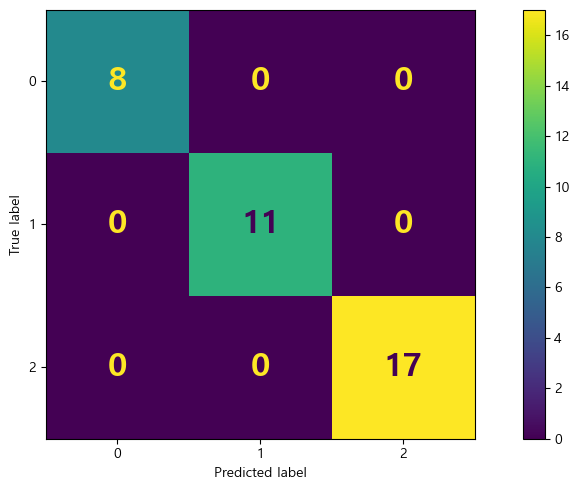


[Roc Curve]


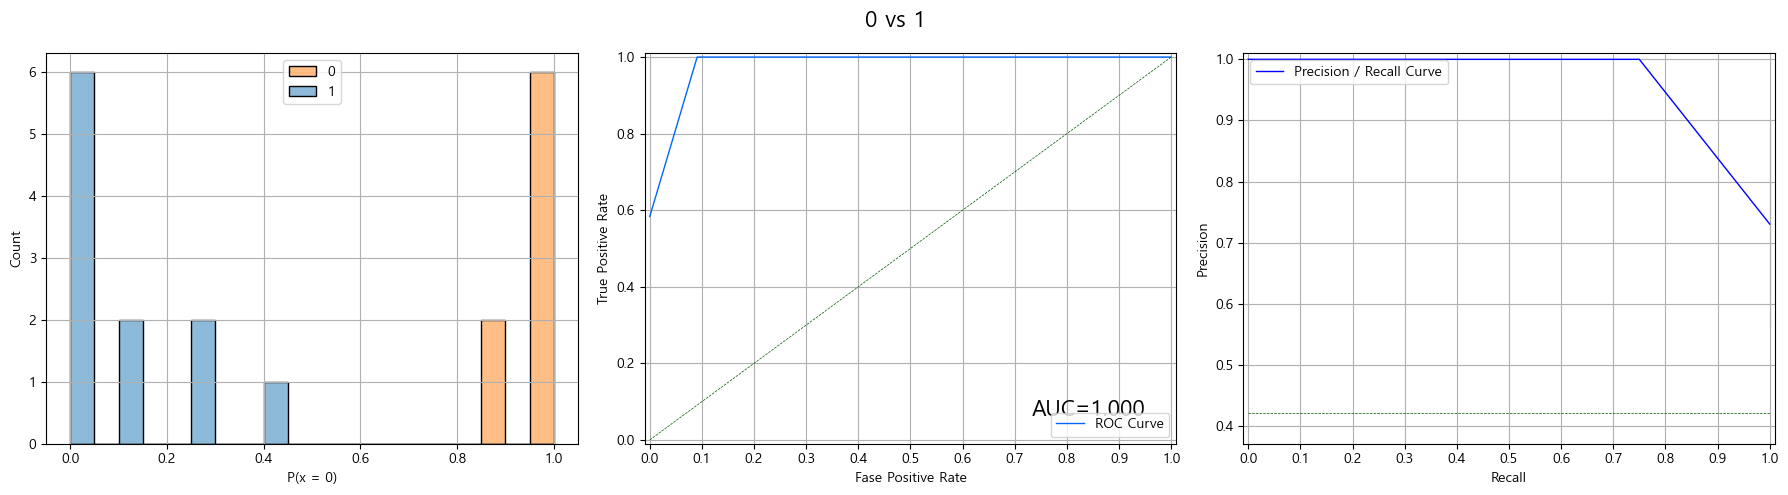

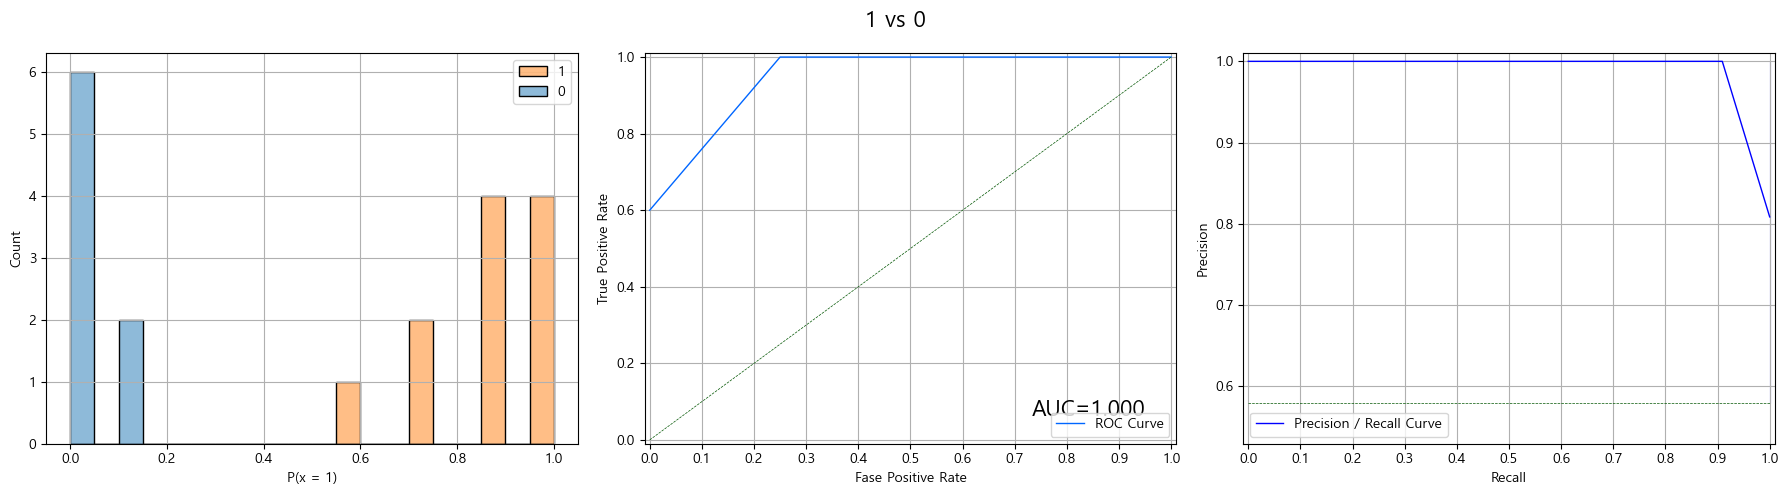

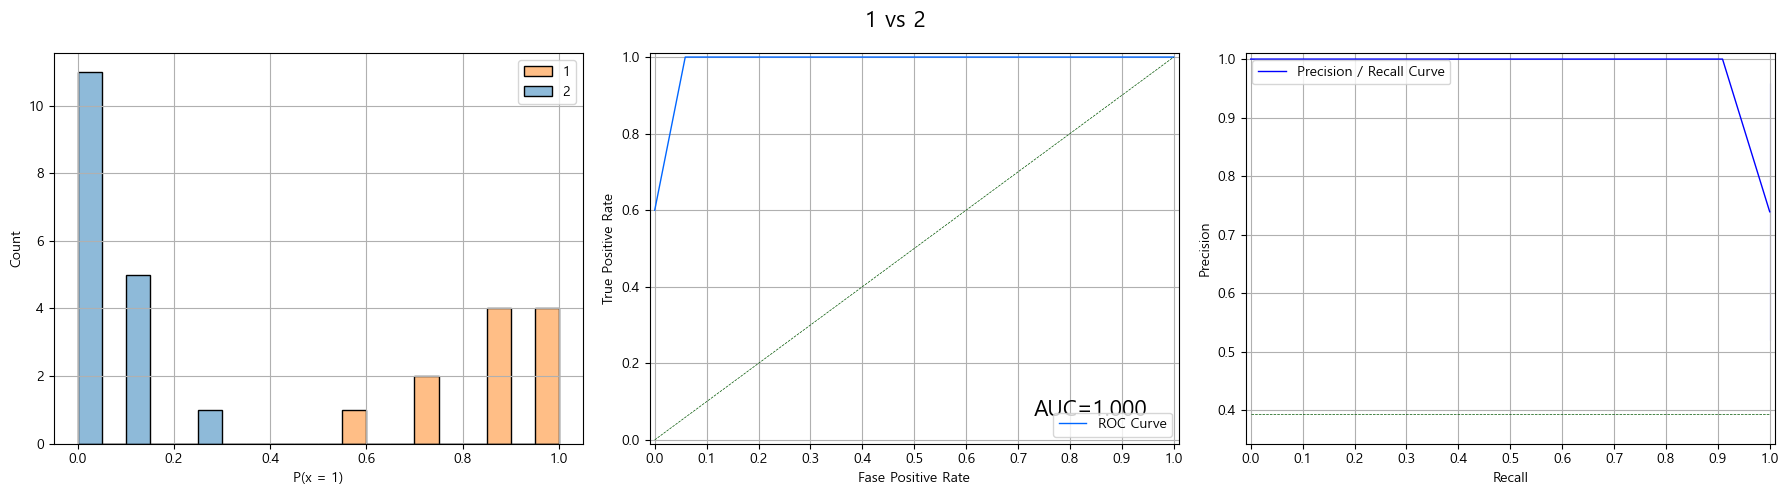

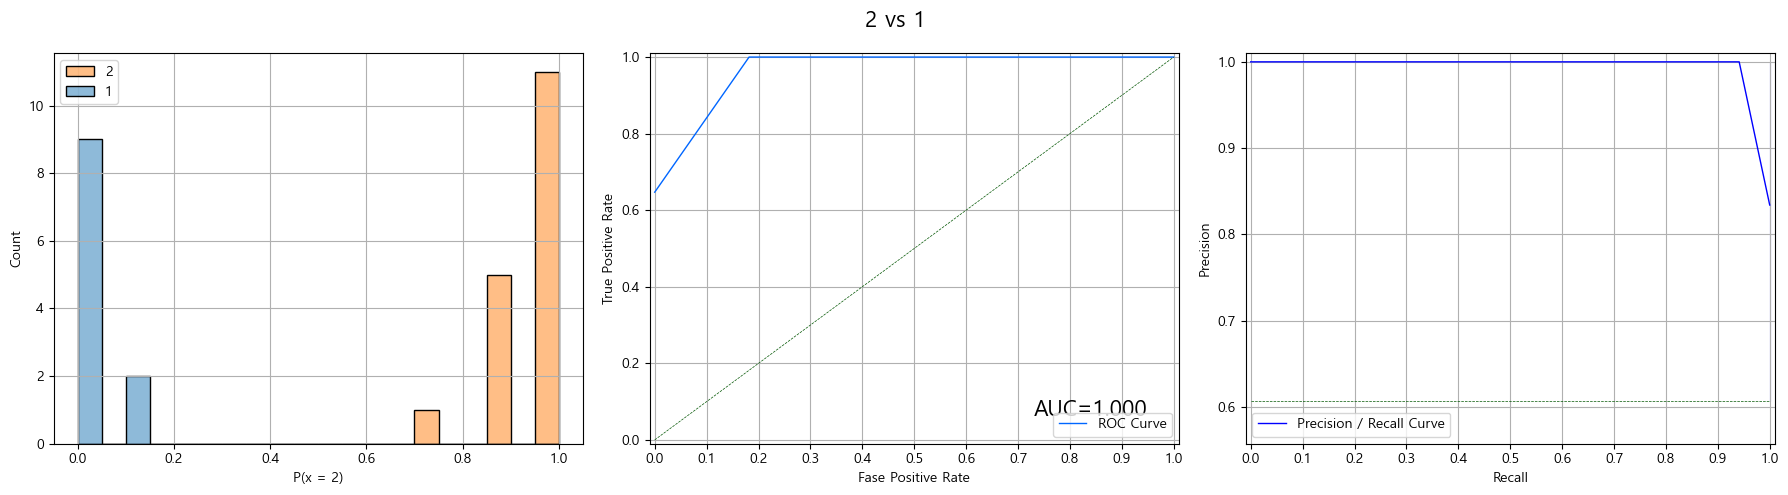

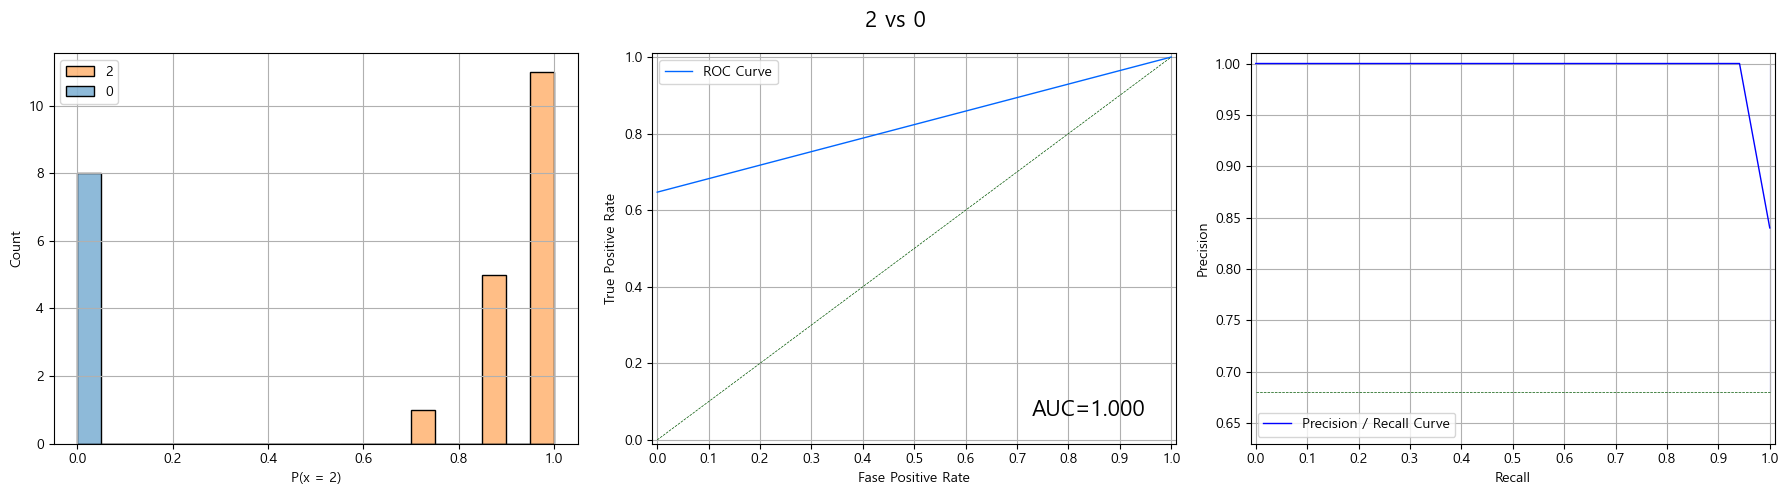

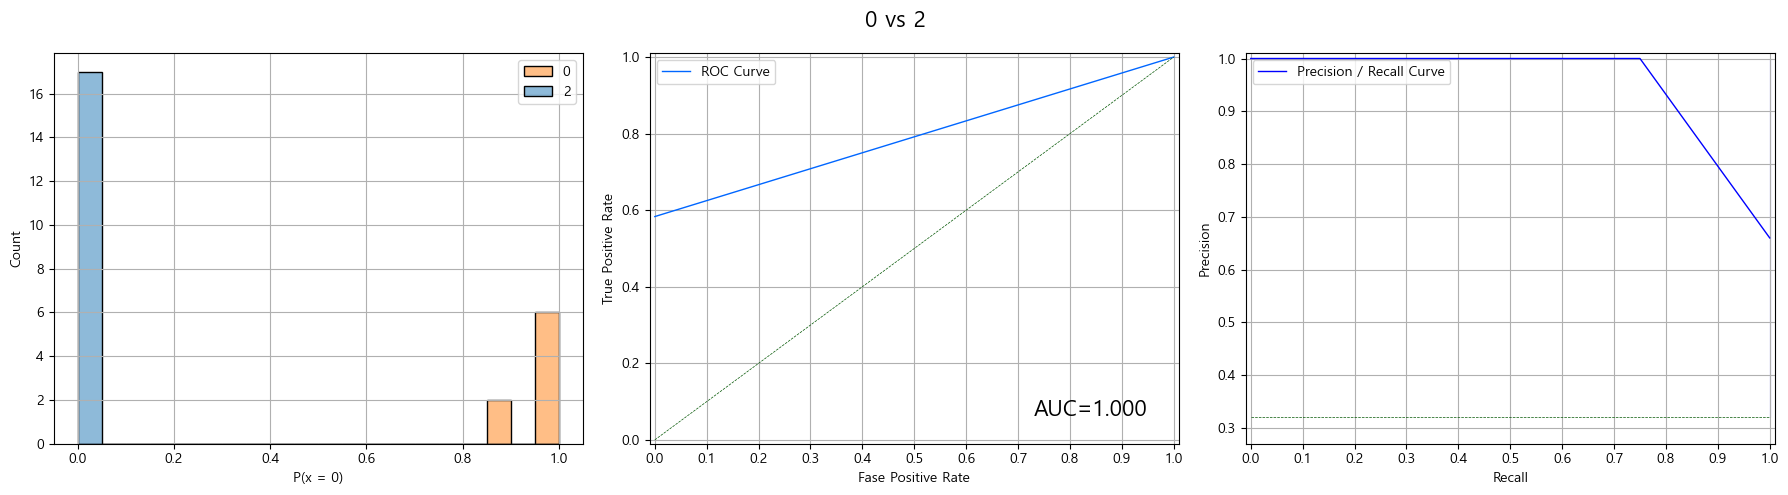

mean roc auc ovo: 1.0000


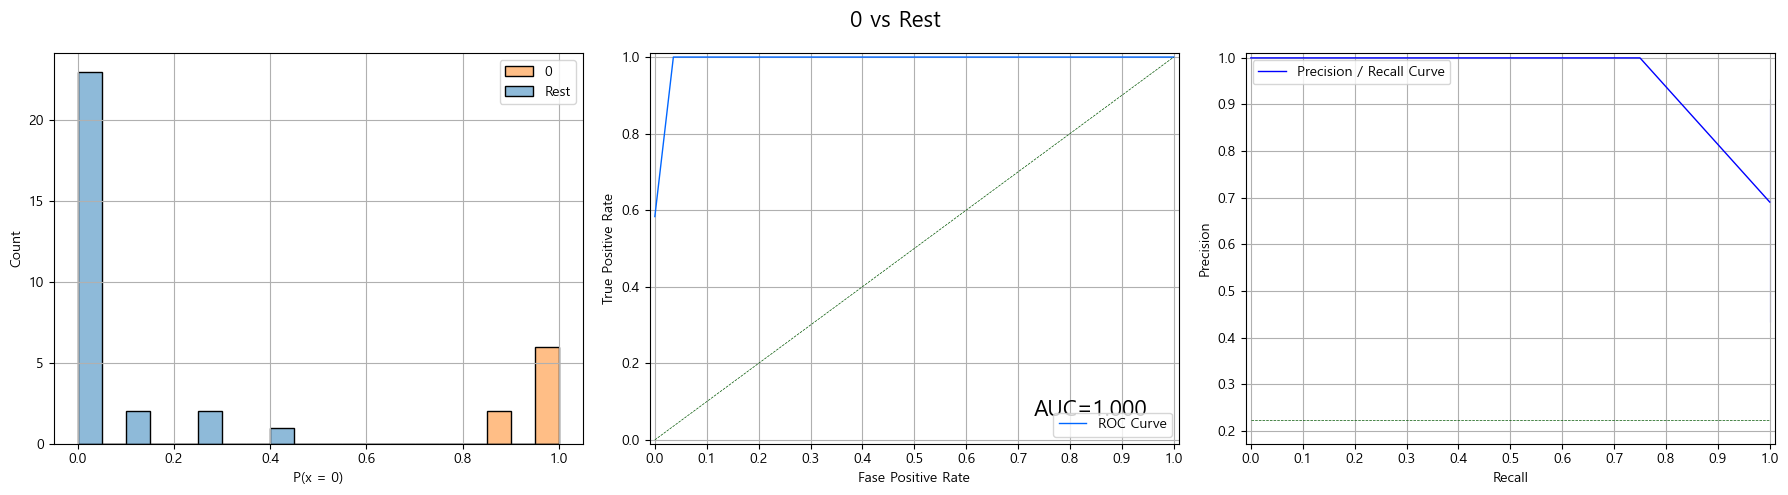

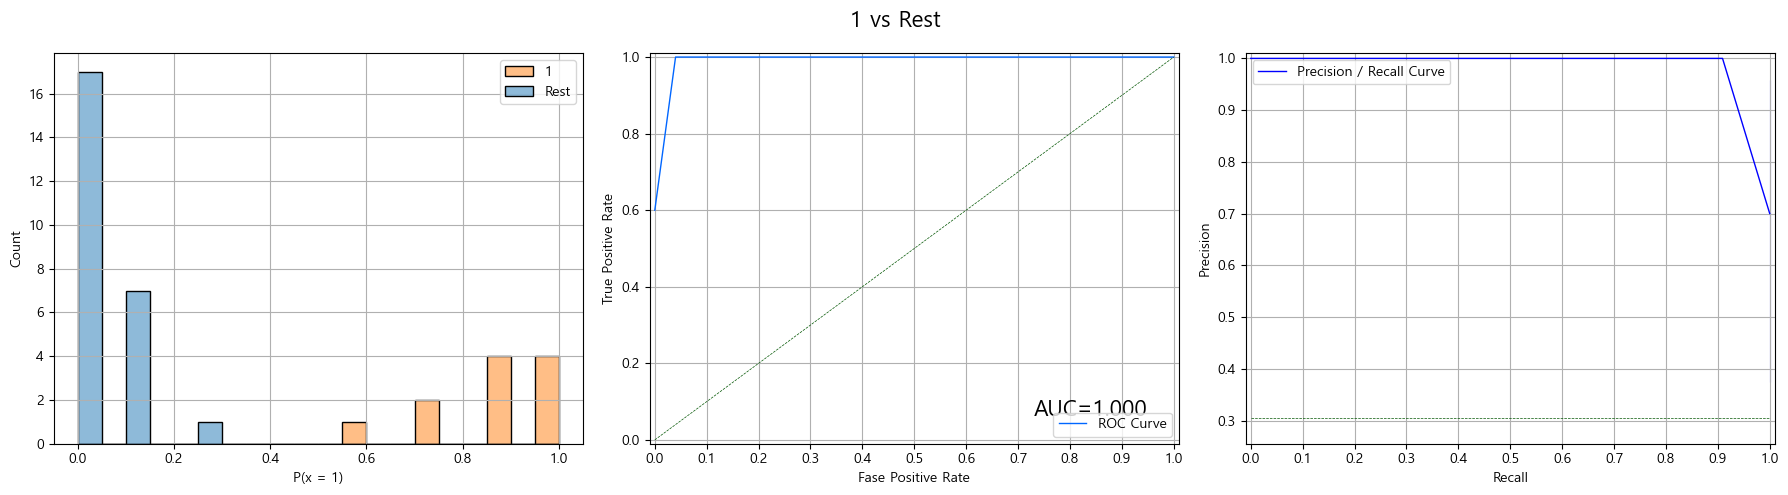

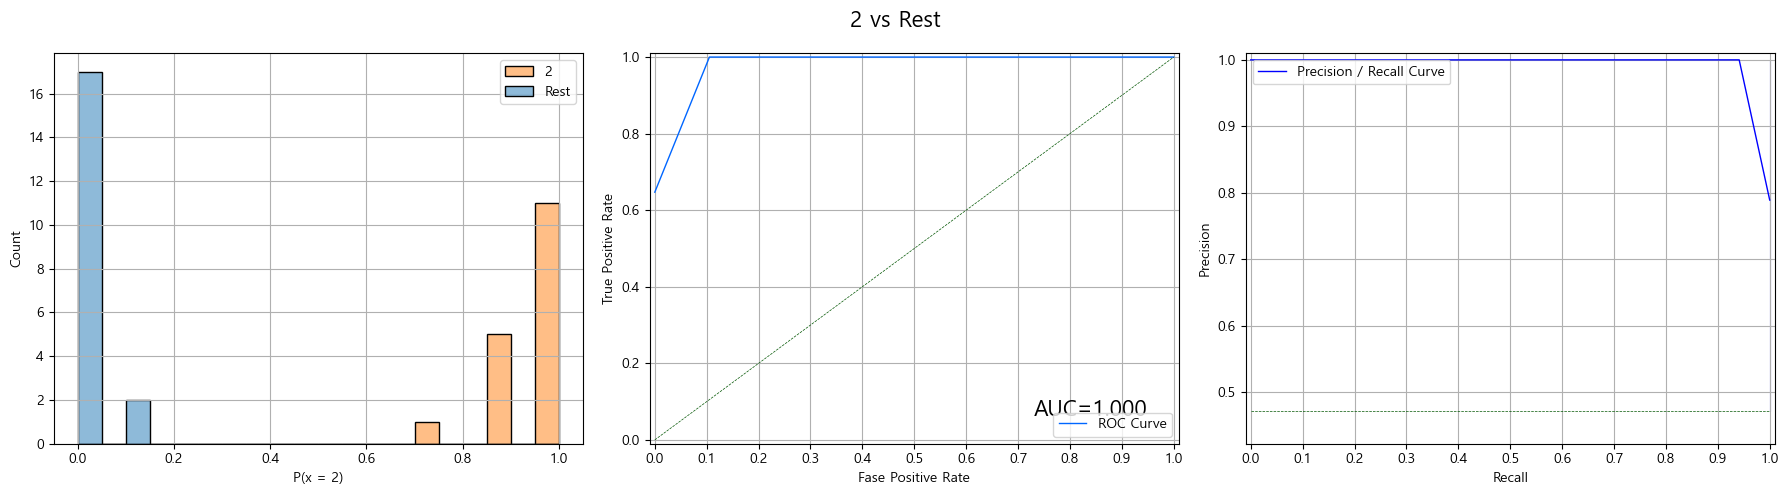

mean roc auc ovo: 1.0000

[학습곡선]


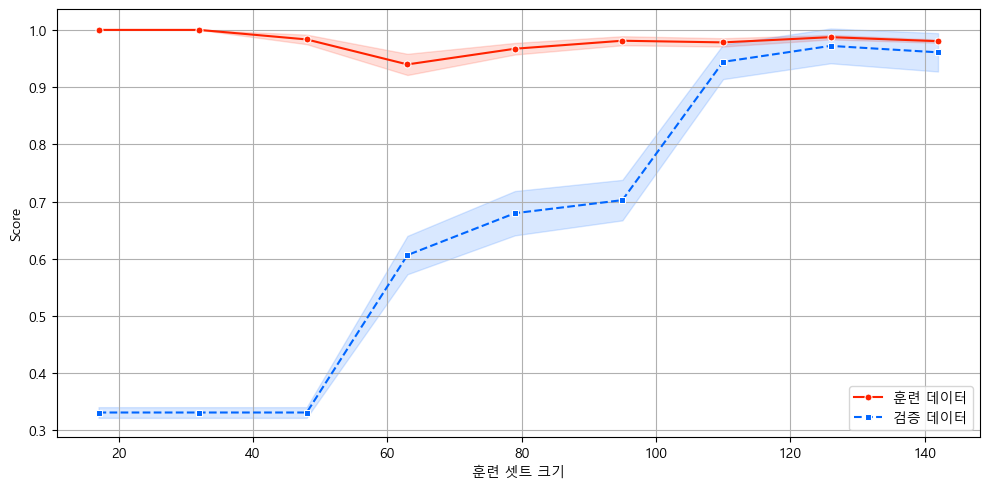

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=7)

In [7]:
my_knn_classification(x_train, y_train, x_test, y_test)

> 로지스틱과 KNN 모두 정확도와 정밀도가 `100%`를 보인다.